# PRIMEIRO MARKDOWN



In [1]:

pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2

# Substitua pelo caminho da imagem no seu PC
img = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG")

# Exibe a imagem em uma janela
cv2.imshow('Imagem', img)
cv2.waitKey(0)  # Aguarda um clique para fechar a janela
cv2.destroyAllWindows()

# Acessando o tamanho da imagem
print(img.shape)

(612, 469, 3)


In [8]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# Função para abrir e exibir a imagem
def abrir_imagem():
    caminho_imagem = filedialog.askopenfilename(title="Escolha uma imagem", 
                                                filetypes=[("Arquivos de imagem", "*.jpg;*.png;*.jpeg")])
    if caminho_imagem:
        img = Image.open(caminho_imagem)
        img.thumbnail((400, 400))  # Redimensionar a imagem para caber na tela
        img_tk = ImageTk.PhotoImage(img)
        lbl_imagem.config(image=img_tk)
        lbl_imagem.image = img_tk  # Necessário para o tkinter manter a referência da imagem

# Configurações da janela principal
root = tk.Tk()
root.title("Visualizador de Imagem")

# Botão para abrir a imagem
btn_abrir = tk.Button(root, text="Abrir Imagem", command=abrir_imagem)
btn_abrir.pack(pady=10)

# Label para exibir a imagem
lbl_imagem = tk.Label(root)
lbl_imagem.pack()

# Inicia o loop do tkinter
root.mainloop()

In [18]:
# Importa o módulo pyodbc para conexão com o banco de dados
import pyodbc 

# Importa o módulo tkinter para construção de interfaces gráficas
import tkinter as tk

# Importa todos os componentes do módulo tkinter
from tkinter import *

# Importa a classe ttk do módulo tkinter para usar widgets aprimorados
from tkinter import ttk,filedialog 

# Importa o módulo ttkbootstrap para aplicar temas Bootstrap no tkinter
import ttkbootstrap as ttkbs
from ttkbootstrap.constants import *

import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageTk


imagem_global = None


def cadastrar():

    janela_cadastrar = Toplevel(janela)
    janela_cadastrar.title("Cadastrar ")

    # Define o fundo da janela principal como um tom escuro
    janela_cadastrar.configure(bg = "#333")
    
    # Define a largura e a altura da janela principal
    largura_janela = 450
    altura_janela = 300
    
    # Obtém as dimensões da tela do usuário
    largura_tela = janela_cadastrar.winfo_screenwidth()
    altura_tela = janela_cadastrar.winfo_screenheight()
    
    # Calcula a posição da janela para que ela seja centralizada na tela
    pos_x = (largura_tela // 2) - (largura_janela // 2)
    pos_y = (altura_tela // 2) - (altura_janela // 2)
    
    # Define a geometria da janela para centralizá-la na tela
    janela_cadastrar.geometry('{}x{}+{}+{}'.format(largura_janela, altura_janela, pos_x, pos_y))


# Função para abrir e exibir a imagem
def abrir_imagem():
    global imagem_global  # Declara a variável global para modificá-la
    caminho_imagem = filedialog.askopenfilename(title="Escolha uma imagem", 
                                                filetypes=[("Arquivos de imagem", "*.jpg;*.png;*.jpeg")])
    if caminho_imagem:
        img = Image.open(caminho_imagem)
        img.thumbnail((400, 400))  # Redimensionar a imagem para caber na tela
        img_tk = ImageTk.PhotoImage(img)
        lbl_imagem.config(image=img_tk)
        lbl_imagem.image = img_tk  # Necessário para o tkinter manter a referência da imagem
        imagem_global = np.array(img)  # Converte a imagem PIL para NumPy,  Atribui a imagem PIL à variável global

def filtro_sobel():

    global imagem_global  # Acessa a variável global
    if imagem_global is not None and imagem_global.size > 0:
        if len(imagem_global.shape) == 3:  # Se for colorida, converte para grayscale
            imagem_gray = cv2.cvtColor(imagem_global, cv2.COLOR_RGB2GRAY)
        else:
            imagem_gray = imagem_global
        
        sobelx = cv2.Sobel(imagem_gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(imagem_gray, cv2.CV_64F, 0, 1, ksize=3)
        # Combinar os gradientes
        sobel_combinado = np.sqrt(sobelx**2 + sobely**2)

        # Normalizar a imagem resultante para o intervalo 0-255
        sobel_combinado = np.uint8(255 * sobel_combinado / np.max(sobel_combinado))
        #sobel_combined = np.uint8(sobel_combined)  # Converte de volta para uint8 para exibir

        # Converte de volta para imagem PIL e exibe no Label da janela principal
        img_sobel = Image.fromarray(sobel_combinado)
        img_sobel.thumbnail((400, 400))
        img_sobel_tk = ImageTk.PhotoImage(img_sobel)
        
        lbl_imagem.config(image=img_sobel_tk)
        lbl_imagem.image = img_sobel_tk
        



# Cria a janela principal para a tela de login
janela = ttkbs.Window(themename="darkly")
janela.title("Tela de Selecção de Imagem")

# Define o fundo da janela principal como um tom escuro
janela.configure(bg = "#333" )

# Configura a janela para iniciar maximizada
janela.state('zoomed')


menu_principal = Menu(janela)

# Adiciona o menu à janela principal
janela.config(menu=menu_principal)

# Cria um submenu com tearoff
menu_opcoes = Menu(menu_principal, tearoff=0, bg="#1f4b99", fg="white", activebackground="#4a6fa5", activeforeground="white")

# Adiciona o submenu ao menu principal com o nome 'Menu'
menu_principal.add_cascade(label="Menu", menu=menu_opcoes)

# Adiciona itens ao submenu
menu_opcoes.add_command(label="Add imagem", command = abrir_imagem)
menu_opcoes.add_command(label="Aply filter", command = filtro_sobel)
menu_opcoes.add_command(label="Sair", command = janela.destroy)

lbl_imagem = tk.Label(janela, bg="#333")
lbl_imagem.pack(pady=20)

# Inicia o loop da interface gráfica
janela.mainloop()

# Inicia o loop da interface gráfica
janela.mainloop()

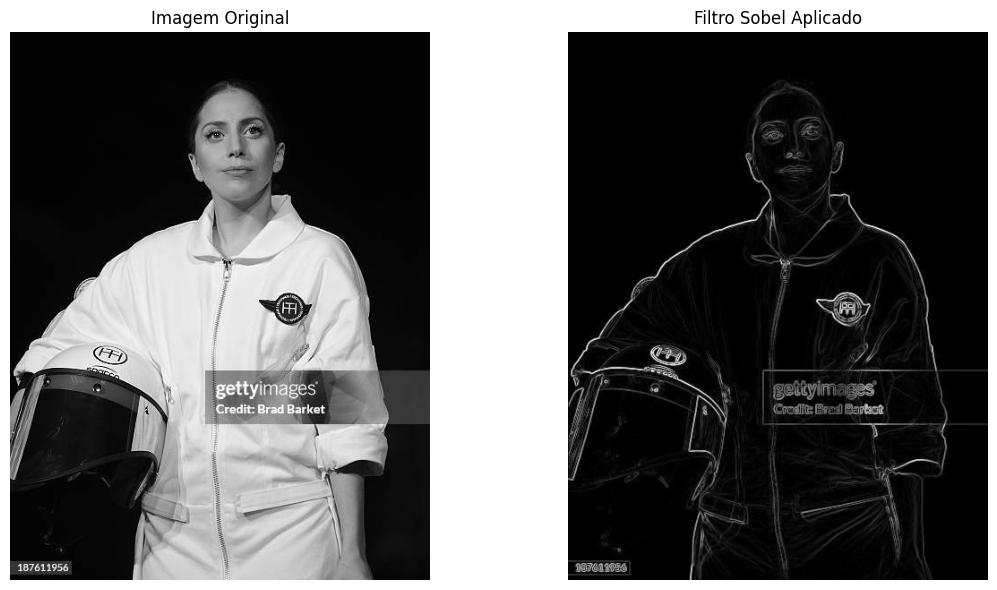

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Sobel
sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)

# Combinar os gradientes
sobel_combinado = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalizar a imagem resultante para o intervalo 0-255
sobel_combinado = np.uint8(255 * sobel_combinado / np.max(sobel_combinado))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Sobel aplicado
plt.subplot(122)
plt.imshow(sobel_combinado, cmap='gray')
plt.title('Filtro Sobel Aplicado')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()